In [1]:
setwd("/group/gilbert-lab/Lutz/Batmicrobiome/Phyloseq_BMP/")

In [11]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)

In [4]:
batfecal_nt = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/BatFecalFTA_nt.rds")

# Shannon Diversity

## By Locality

In [69]:
sample_tab = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Metadata_files/FullMetaData_Bat_FecalFTA.csv")

In [70]:
#Use non-transformed data ("ps_nt")

sha = estimate_richness(batfecal_nt, split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("Locality") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("Locality")

In [71]:
stats = dfsha %>%
    group_by(Locality) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(Locality))
stats

Locality,median,mean,sd,sem
0,0.3758660,0.3758660,NA,NA
Acholi,1.5205607,1.5684190,0.7159697,0.08682408
Aringa,1.3655669,1.4107657,0.6629146,0.15208304
Buzambuli,2.9002483,2.5930443,0.9046824,0.34193781
Chyulu,0.6367444,0.9251446,0.8725881,0.16203554
Diatomite,1.0224711,1.2804847,0.8895153,0.12974914
Ikhondo,1.5394233,1.4890770,1.0639015,0.53195073
Kaboga,1.5912839,1.7463597,0.6649581,0.13865334
Kaptum,0.7374711,0.7924049,0.1972038,0.09860191
Kariandusi,1.1680573,1.4110994,0.7815897,0.21677397


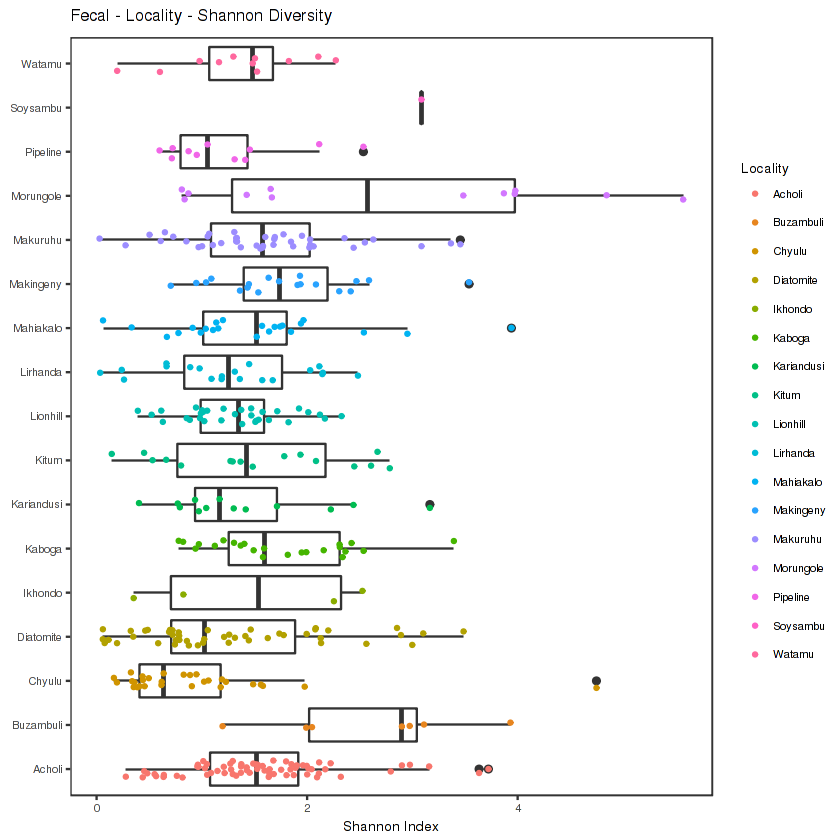

In [72]:
#Plot

p = ggplot(na.omit(dfsha), aes(x = Locality, y = Shannon)) + ggtitle("Fecal - Locality - Shannon Diversity")

p = p + geom_boxplot() + ylab("Shannon Index") + coord_flip()

p = p + geom_point(size = .75, aes(color = Locality),  
                   position = position_jitter(h = 0, w = 0.2))

p = p + theme_bw() + theme(text=element_text(size=8, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           #legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())
p

# By Host_Genus

In [73]:
#Use non-transformed data ("ps_nt")

sha = estimate_richness(batfecal_nt, split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("Host_Genus") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("Host_Genus")

In [74]:
stats = dfsha %>%
    group_by(Host_Genus) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(Host_Genus))
stats

Host_Genus,median,mean,sd,sem
Chaerephon,1.2631497,1.166103,0.7054716,0.20365210
Coleura,1.6798738,1.594481,0.4722512,0.14238910
Epomophorus,1.5762175,1.446757,0.5961673,0.17975121
Hipposideros,1.4923468,1.570671,0.7895940,0.09178844
Micropteropus,1.7884967,1.899632,0.3384178,0.19538562
Miniopterus,1.2329748,1.438490,0.9841214,0.10260175
Myonycteris,0.5368631,1.146198,1.3472352,0.67361762
Myotis,1.6534693,1.653469,NA,NA
Neoromicia,2.3381862,2.195617,0.4249756,0.21248778
Nycteris,1.3369806,1.664485,1.0658065,0.26645163


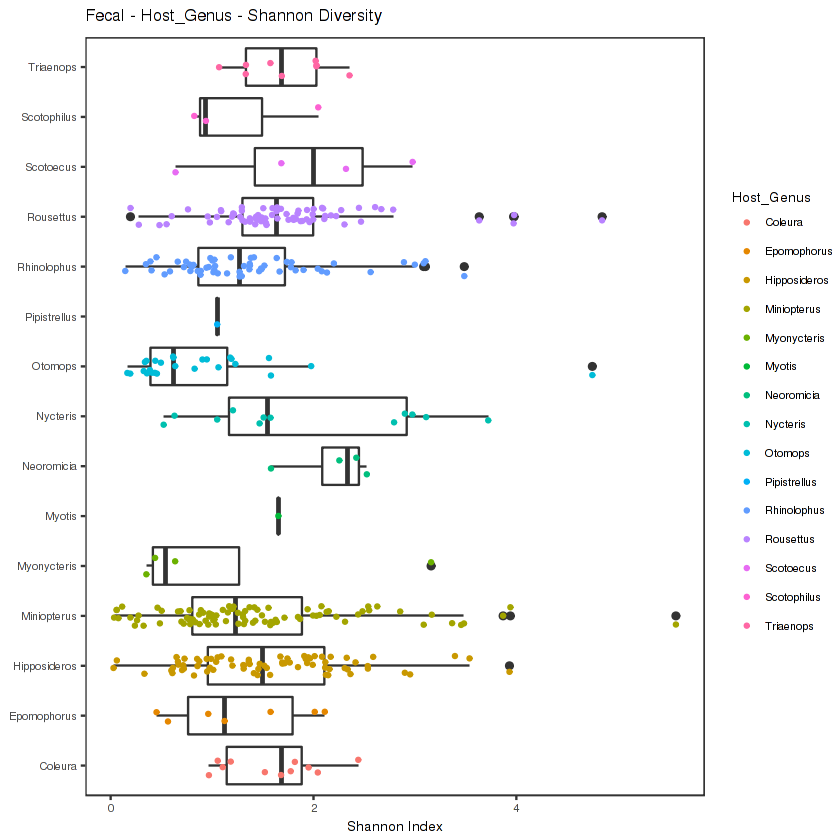

In [76]:
#Plot

p = ggplot(na.omit(dfsha), aes(x = Host_Genus, y = Shannon)) + ggtitle("Fecal - Host_Genus - Shannon Diversity")

p = p + geom_boxplot() + ylab("Shannon Index") + coord_flip()

p = p + geom_point(size = .75, aes(color = Host_Genus),  
                   position = position_jitter(h = 0, w = 0.2))

p = p + theme_bw() + theme(text=element_text(size=8, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           #legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())
p

# By Host_species

In [77]:
#Use non-transformed data ("ps_nt")

sha = estimate_richness(batfecal_nt, split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("Host_species") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("Host_species")

In [81]:
stats = dfsha %>%
    group_by(Host_species) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(Host_species))
stats

Host_species,median,mean,sd,sem
0,1.2705934,1.4295242,0.5551121,0.15396040
aegyptiacus,1.7799997,1.9574041,0.9636812,0.17035637
afer,1.6874680,1.7144198,0.4226788,0.14089293
afra,1.6798738,1.5944812,0.4722512,0.14238910
angolensis,0.5368631,1.1461976,1.3472352,0.67361762
arge,3.0424119,3.1769639,0.3739418,0.18697090
bivitattus,1.2631497,1.1661033,0.7054716,0.20365210
caffer,1.3703166,1.4328619,0.7051895,0.10754039
camerunensis,3.4160285,3.4160285,0.7294233,0.51578014
cf. africanus,1.0224711,1.0661039,0.7553108,0.15749320


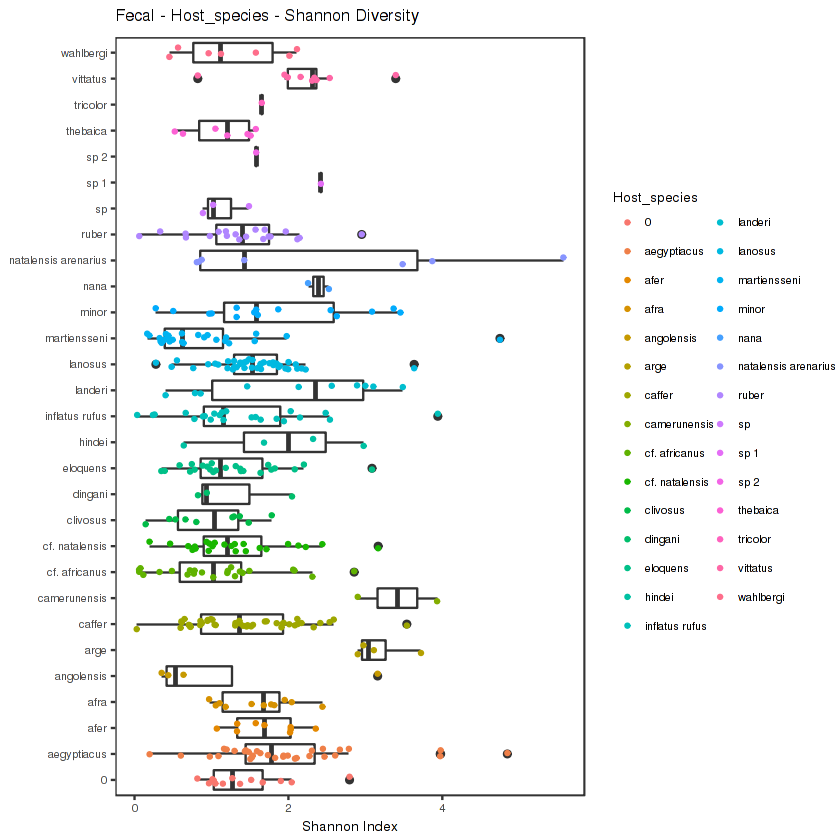

In [85]:
#Plot

p = ggplot(na.omit(dfsha), aes(x = Host_species, y = Shannon)) + ggtitle("Fecal - Host_species - Shannon Diversity")

p = p + geom_boxplot() + ylab("Shannon Index") + coord_flip()

p = p + geom_point(size = .75, aes(color = Host_species),  
                   position = position_jitter(h = 0, w = 0.2))

p = p + theme_bw() + theme(text=element_text(size=8, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           #legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())
p

# By Haem_status

In [82]:
#Use non-transformed data ("ps_nt")

sha = estimate_richness(batfecal_nt, split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("Haem_status") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("Haem_status")

In [83]:
stats = dfsha %>%
    group_by(Haem_status) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(Haem_status))
stats

Haem_status,median,mean,sd,sem
0,1.451466,1.514111,0.8247580,0.04699495
1,1.190590,1.460424,1.0178287,0.12079404
NA,1.314989,1.264585,0.6631452,0.13536396


Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”

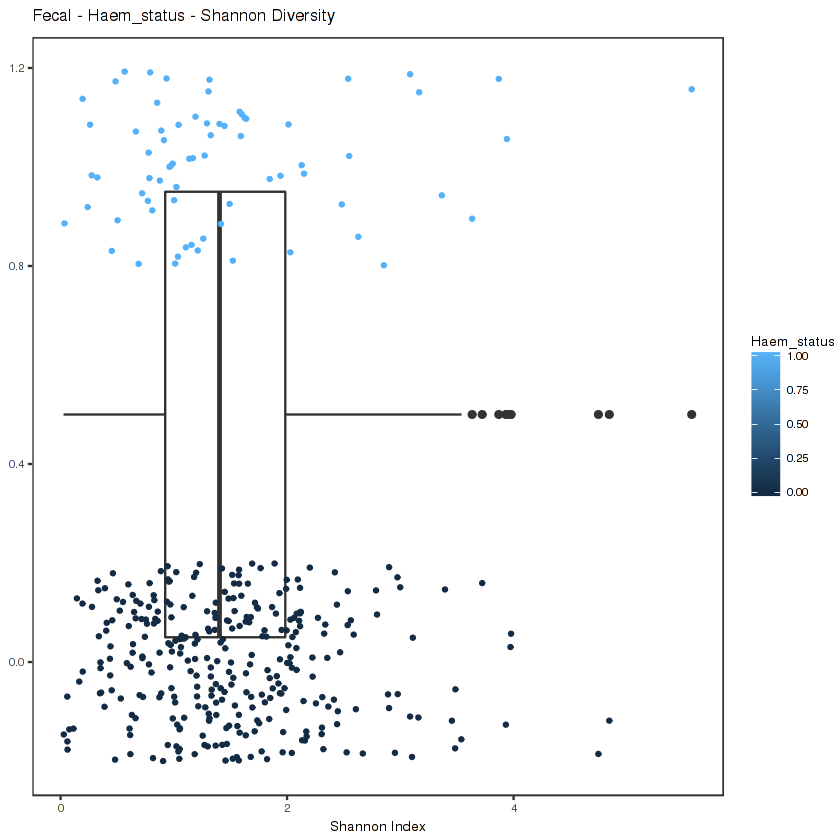

In [84]:
#Plot

p = ggplot(na.omit(dfsha), aes(x = Haem_status, y = Shannon)) + ggtitle("Fecal - Haem_status - Shannon Diversity")

p = p + geom_boxplot() + ylab("Shannon Index") + coord_flip()

p = p + geom_point(size = .75, aes(color = Haem_status),  
                   position = position_jitter(h = 0, w = 0.2))

p = p + theme_bw() + theme(text=element_text(size=8, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           #legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())
p

# By Ecto_status

In [86]:
#Use non-transformed data ("ps_nt")

sha = estimate_richness(batfecal_nt, split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("Ecto_status") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("Ecto_status")

In [87]:
stats = dfsha %>%
    group_by(Ecto_status) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(Ecto_status))
stats

Ecto_status,median,mean,sd,sem
0,1.412845,1.520729,0.9438119,0.07015299
1,1.370447,1.488810,0.7839667,0.05571409
NA,1.314989,1.264585,0.6631452,0.13536396


Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”

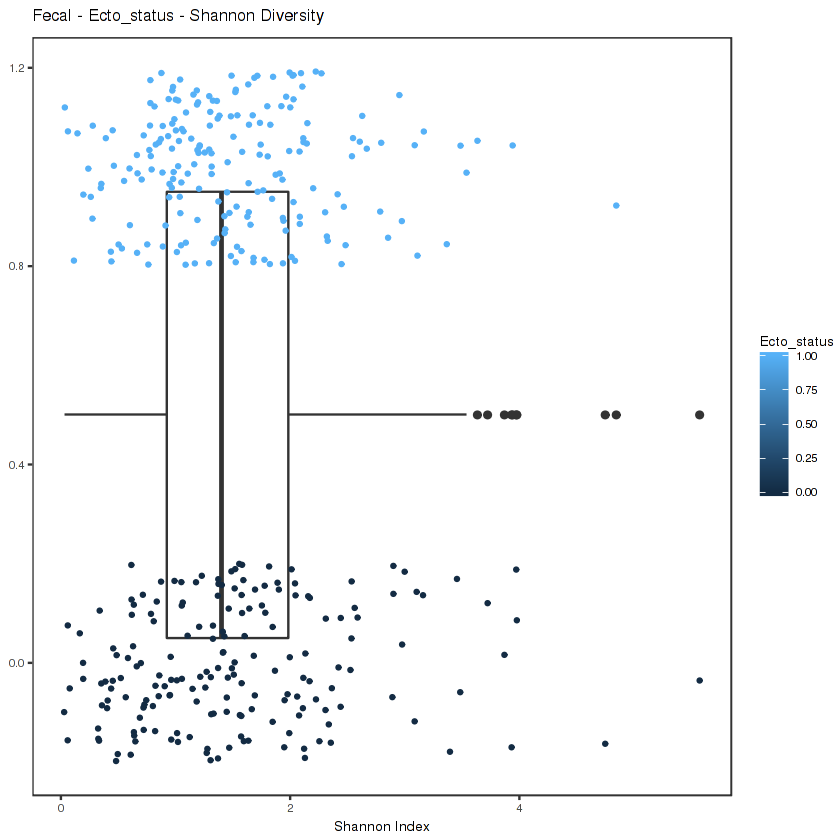

In [88]:
#Plot

p = ggplot(na.omit(dfsha), aes(x = Ecto_status, y = Shannon)) + ggtitle("Fecal - Ecto_status - Shannon Diversity")

p = p + geom_boxplot() + ylab("Shannon Index") + coord_flip()

p = p + geom_point(size = .75, aes(color = Ecto_status),  
                   position = position_jitter(h = 0, w = 0.2))

p = p + theme_bw() + theme(text=element_text(size=8, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           #legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())
p